In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from matplotlib.text import Text

import geopandas as gpd
import pandas as pd

import geopy.distance

In [2]:
train_file = 'data/out/file_with_state.csv'

train_data = pd.read_csv(train_file)

In [3]:
la_orig = train_data['latitud_origen'].values
lo_orig = train_data['longitud_origen'].values
la_dest = train_data['latitud_destino'].values
lo_dest = train_data['longitud_destino'].values

distances = []
states_orig = []
states_dest = []
for la1, lo1, la2, lo2 in zip(la_orig,lo_orig,la_dest,lo_dest):
    dist = geopy.distance.distance((la1,lo1),(la2,lo2)).m
    distances.append(dist)

train_data['distancia_tierra'] = distances

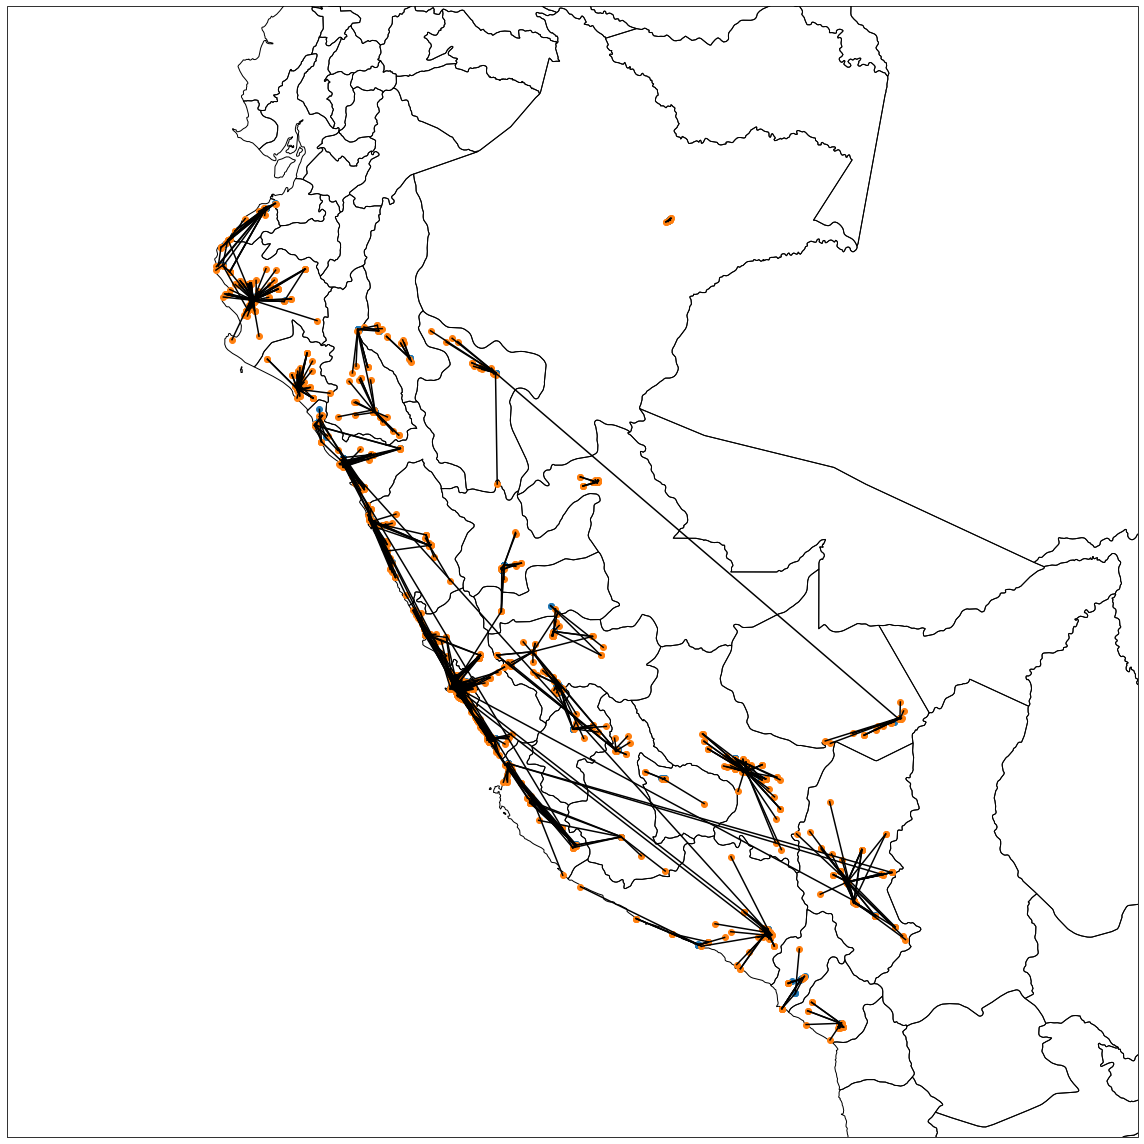

In [4]:
proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(16,16))
ax.set_extent([-85,
               -65,
               -20,
               0], 
              crs=ccrs.PlateCarree())

x1 = train_data['longitud_origen'].tolist()
y1 = train_data['latitud_origen'].tolist()
x2 = train_data['longitud_destino'].tolist()
y2 = train_data['latitud_destino'].tolist()

ax.scatter(x1, y1)
ax.scatter(x2, y2)

for i in range(len(x1)):
    x_values = [x1[i],x2[i]]
    y_values = [y1[i],y2[i]]

    ax.plot(x_values,y_values,'k-')

ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=0)

fig.canvas.draw()
fig.tight_layout()

plt.show()

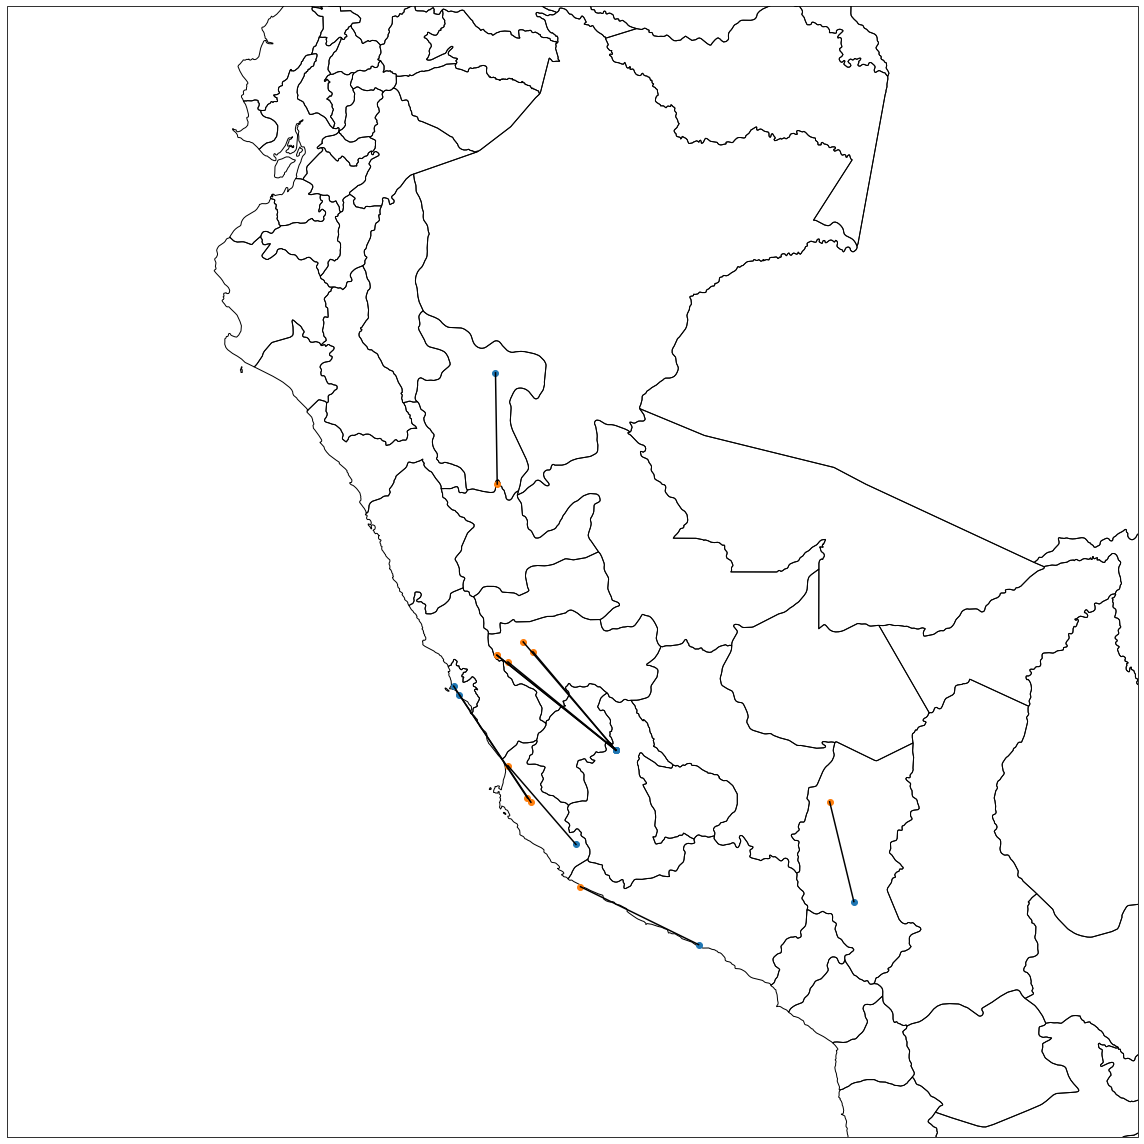

In [5]:
proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(16,16))
ax.set_extent([-85,
               -65,
               -20,
               0], 
              crs=ccrs.PlateCarree())

x1 = train_data.loc[(train_data['distancia_tierra']>=200000)&(train_data['distancia_tierra']<=300000)]['longitud_origen'].tolist()
y1 = train_data.loc[(train_data['distancia_tierra']>=200000)&(train_data['distancia_tierra']<=300000)]['latitud_origen'].tolist()
x2 = train_data.loc[(train_data['distancia_tierra']>=200000)&(train_data['distancia_tierra']<=300000)]['longitud_destino'].tolist()
y2 = train_data.loc[(train_data['distancia_tierra']>=200000)&(train_data['distancia_tierra']<=300000)]['latitud_destino'].tolist()

ax.scatter(x1, y1)
ax.scatter(x2, y2)

for i in range(len(x1)):
    x_values = [x1[i],x2[i]]
    y_values = [y1[i],y2[i]]

    ax.plot(x_values,y_values,'k-')

ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=0)

fig.canvas.draw()
fig.tight_layout()

plt.show()

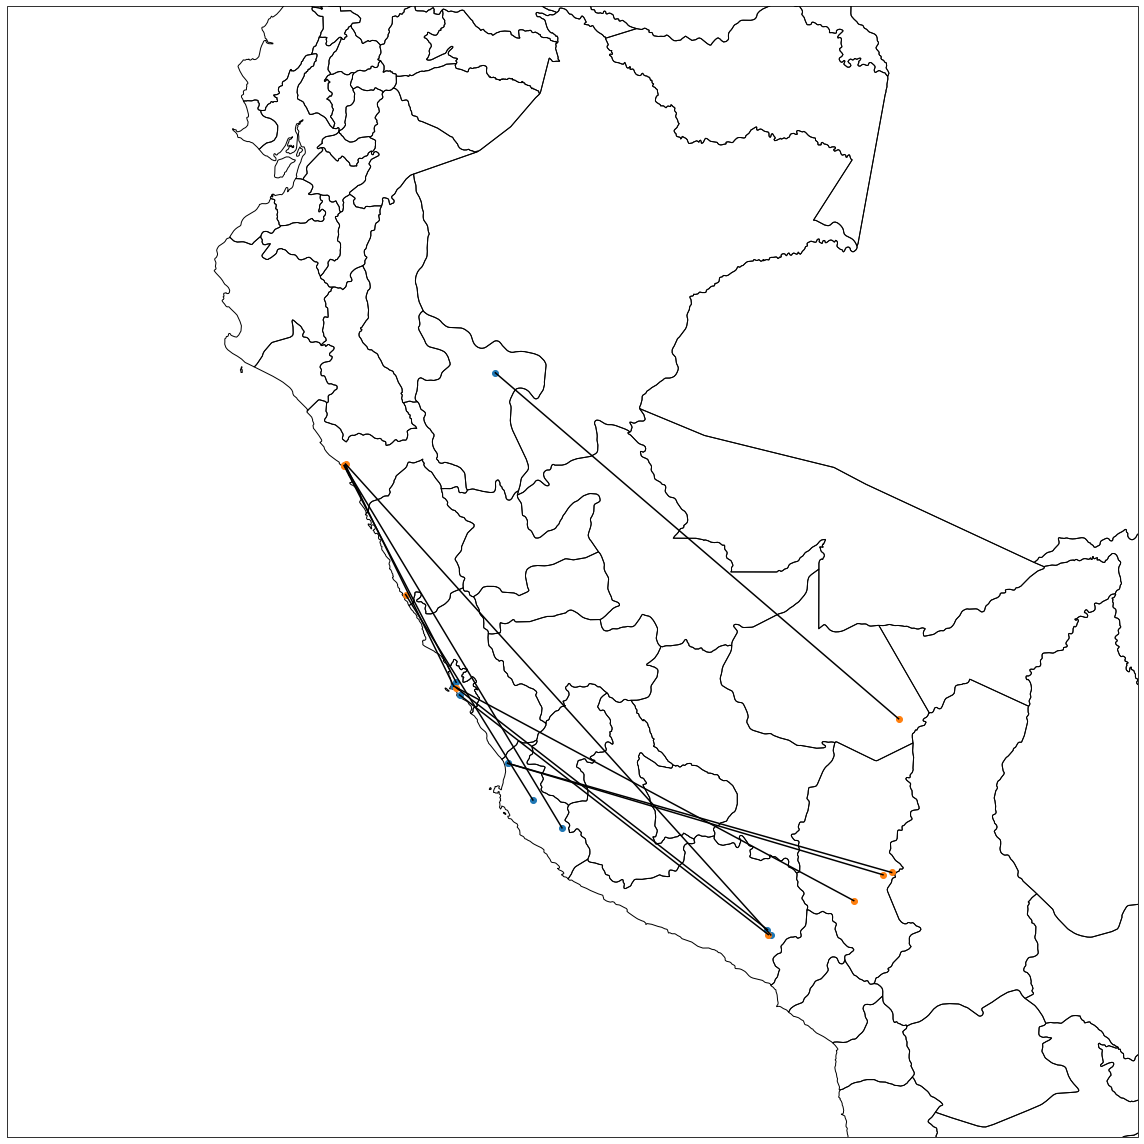

In [6]:
proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(16,16))
ax.set_extent([-85,
               -65,
               -20,
               0], 
              crs=ccrs.PlateCarree())

x1 = train_data.loc[train_data['distancia_tierra']>=300000]['longitud_origen'].tolist()
y1 = train_data.loc[train_data['distancia_tierra']>=300000]['latitud_origen'].tolist()
x2 = train_data.loc[train_data['distancia_tierra']>=300000]['longitud_destino'].tolist()
y2 = train_data.loc[train_data['distancia_tierra']>=300000]['latitud_destino'].tolist()

ax.scatter(x1, y1)
ax.scatter(x2, y2)

for i in range(len(x1)):
    x_values = [x1[i],x2[i]]
    y_values = [y1[i],y2[i]]

    ax.plot(x_values,y_values,'k-')

ax.add_feature(cfeature.STATES.with_scale('10m'), zorder=0)

fig.canvas.draw()
fig.tight_layout()

plt.show()